In [5]:
from pylab import *
%matplotlib inline

In [4]:
run libreriacool.ipynb

METODO A SEGUNDO ORDEN #Segundo método 

$$
y_{n+1} = y_n + hf(x_n,y_n) + \frac{h^2}{2} \left(
\frac{\partial f}{\partial x}+ \frac{\partial f}{\partial y} f \right)
$$
donde $f$ y sus parciales están evaluadas en $f(x_n,y_n)$

In [97]:
def segundo_orden1(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo=arange(0,t_final+h,h) #
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] +=  0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] +=  0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [98]:
def euler1(ec_diff,p_ini,t_final,h=0.01):
    tiempo=arange(0,t_final+h,h)#
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1]=y[i] + h*ec_diff(y[i],tiempo[i])

    return tiempo,y

In [99]:
def ec_diff(y,x):
    return x*sin(y)

def d_ec_diff(y,x):
    return sin(y),x*cos(y)

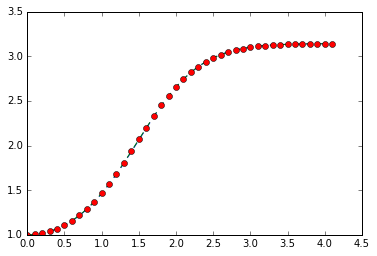

In [100]:
y_euler = euler1(ec_diff,1,4.1)
y_euler01 = euler1(ec_diff,1,4.1,0.001)
y_seg= segundo_orden1(ec_diff,1,4.1,d_ec_diff)
plot(y_euler[0],y_euler[1],'--')
plot(y_euler01[0],y_euler01[1],'--')
plot(y_seg[0],y_seg[1],'o')
legend()
show()